### 1. IMPORT LIBRARIES AND CIFAR 10, PREPARE DATA

In [1]:
# general
import numpy as np
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
import time
import matplotlib.pyplot as plt
% matplotlib inline

# dataset
from keras.datasets import cifar10

# modeling tools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


Check and Prepare Data:

In [2]:
# split data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# check data dimension
print('training data shape: {}'.format(x_train.shape))
print('test data shape: {}'.format(x_test.shape))

training data shape: (50000, 32, 32, 3)
test data shape: (10000, 32, 32, 3)


In [3]:
# check labels
labels = []
for y in y_train.flatten():
    if y not in labels:
        labels.append(y)
print('training labels are: {}'.format(labels))
print('# labels: {}'.format(len(labels)))

training labels are: [6, 9, 4, 1, 2, 7, 8, 3, 5, 0]
# labels: 10


In [0]:
# Convert class vectors to one-hot encoded vectors.
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [0]:
# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

x_train = np.reshape(x_train,(50000,3072))
x_test = np.reshape(x_test,(10000,3072))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

x_train /= 255
x_test /= 255

### 2. HELP FUNCTION

In [0]:
# plot the accuracy and loss of training process

def plotAcc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model_accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc = 'lower right')
    
def plotLoss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model_loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc = 'upper right')

In [0]:
# get the best accuracy result

def getBest(record):
    max_acc = 0
    experiment = None
    for value in record.values():
        max_acc = max(max_acc, value[1])

    for key in record.keys():
        if record[key][1] == max_acc:
            experiment = key
      
    return max_acc, experiment, record[experiment][3]

In [0]:
# get the summary of all experiments

import pandas as pd

def get_allResult(record):
    df_result = pd.DataFrame()
    length = len(list(record.keys()))
    df_result['Experiment'] = list(record.keys())
    df_result['Loss'] = [list(record.values())[i][0] for i in range(length)]
    df_result['Accuracy'] = [list(record.values())[i][1] for i in range(length)]
    return df_result

### 3. EXPERIMENTS - TEST WITH ACTIVATION FUNCTIONS

#### 1. Set up hyperparameters for activation functions

In [0]:
# as 'relu' has tested in previous experiments, here only other functions are added
list_activation = ['tanh', 'sigmoid', 'softsign', 'softplus']

#### 2. Control other conditions and hyperparameters

In [0]:
# set conditions
n_class = 10
input_dimension = 32*32*3

# hyper parameters
n_neuron = 256
batch_size = 128
dropout_rate = 0.2
epochs = 20

# use the best combo of optimizer and lr from optimizer experiment
optimizer = keras.optimizers.Adam(lr = 0.0003)

# record hyper parameter information in dictionary                 
param_dict = {
        'num_neurons': 256,
        'num_layers': 2,
        'batch_size': 128,
        'dropout_rate': 0.2,
        'epochs': 20,
        'optimizer':'Adam with 0.0003 lr'
    }

#### 3. Set up experiment function

In [0]:
def experiment_activation(list_activation):
    
    record = {}    
    for i, _ in enumerate(list_activation):
        
        model = Sequential()
        model.add(Dense(n_neuron, activation = _, input_dim = input_dimension))
        model.add(Dropout(dropout_rate))
        model.add(Dense(n_neuron, activation = _))
        model.add(Dropout(dropout_rate))
        model.add(Dense(n_class, activation = 'softmax'))

        model.compile(optimizer = optimizer,
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

        start = time.clock()
        exp_activation = model.fit(x_train, 
                                  y_train, 
                                  epochs = epochs, 
                                  batch_size = batch_size,
                                  verbose = 2,
                                  validation_data = (x_test, y_test))
        elapsed = (time.clock() - start)
        scores = model.evaluate(x_test, y_test, verbose=1)
        
        # record experiment information:
        record[str(list_activation[i])] = [scores[0], scores[1], elapsed, exp_activation]
        
        # print experiment name:
        print('*******************************************************')
        print('=======================================================')
        print('Experiment' + str(i) + ':'  + '\t' + str(list_activation[i]))
        print('=======================================================')
        # print all used parameters for this model
#         for i,j in param_dict.items():
#             print(str(i) + '\t' + str(j)) 
#             print('-------------------------------------------------------')
            
        # print running time used
        print('Time Used: {}'.format(elapsed))
        print('-------------------------------------------------------')
        
        # print best loss and accuracy result
        print('Test loss:', scores[0])
        print('-------------------------------------------------------')
        print('Test accuracy:', scores[1])
        
        print('*******************************************************')
        
    return record

#### 4. Experiment

In [12]:
record = experiment_activation(list_activation)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 1.9752 - acc: 0.2935 - val_loss: 1.7843 - val_acc: 0.3656
Epoch 2/20
 - 3s - loss: 1.8244 - acc: 0.3484 - val_loss: 1.7244 - val_acc: 0.3870
Epoch 3/20
 - 3s - loss: 1.7447 - acc: 0.3759 - val_loss: 1.6357 - val_acc: 0.4179
Epoch 4/20
 - 3s - loss: 1.6997 - acc: 0.3946 - val_loss: 1.5978 - val_acc: 0.4414
Epoch 5/20
 - 3s - loss: 1.6612 - acc: 0.4078 - val_loss: 1.5688 - val_acc: 0.4363
Epoch 6/20
 - 3s - loss: 1.6382 - acc: 0.4187 - val_loss: 1.5601 - val_acc: 0.4526
Epoch 7/20
 - 3s - loss: 1.6101 - acc: 0.4252 - val_loss: 1.5423 - val_acc: 0.4527
Epoch 8/20
 - 3s - loss: 1.5891 - acc: 0.4333 - val_loss: 1.5380 - val_acc: 0.4559
Epoch 9/20
 - 3s - loss: 1.5682 - acc: 0.4402 - val_loss: 1.5148 - val_acc: 0.4565
Epoch 10/20
 - 3s - loss: 1.5525 - acc: 0.4457 - val_loss: 1.5047 - val_acc: 0.4633
Epoch 11/20
 - 3s - loss: 1.5375 - acc: 0.4536 - val_loss: 1.4868 - val_acc: 0.4666
Epoch 12/20
 - 3s - loss: 1.5157 - 

### 4. SUMMRIZE EXPERIMENTS RESULTS

#### 1. Best result

In [13]:
max_acc, experiment, history = getBest(record)
print('The Best Result is:')
max_acc, experiment

The Best Result is:


(0.507, 'softplus')

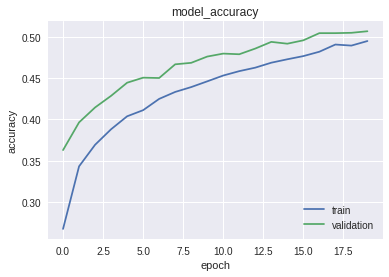

In [14]:
plotAcc(history)

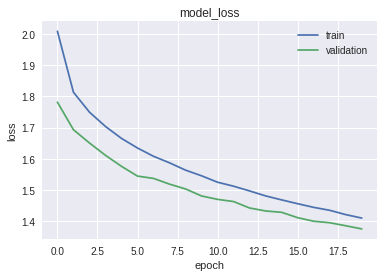

In [15]:
plotLoss(history)

#### 2. Result summary

In [0]:
df_result = get_allResult(record)

# add control parameters

df_result['optimizer'] = 'Adam with learning rate @ 0.0003'
df_result['num_layers'] = 3
df_result['num_neurons'] = 256
df_result['batch_size'] = 128
df_result['dropout_rate'] = 0.2
df_result['epochs'] = 20

In [18]:
df_result.rename(columns = {"Experiment": "activation"}, inplace = True)
df_result.sort_values(by = 'Accuracy', axis = 0, ascending = False)

,activation,Loss,Accuracy,optimizer,num_layers,num_neurons,batch_size,dropout_rate,epochs
3,softplus,1.374259,0.5070,Adam with learning rate @ 0.0003,3,256,128,0.2,20
1,sigmoid,1.420806,0.4912,Adam with learning rate @ 0.0003,3,256,128,0.2,20
0,tanh,1.470880,0.4873,Adam with learning rate @ 0.0003,3,256,128,0.2,20
2,softsign,1.454655,0.4792,Adam with learning rate @ 0.0003,3,256,128,0.2,20
